In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from zipfile import ZipFile
import json
import folium

import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx 

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%load_ext autoreload
%autoreload 2

import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import matplotlib.pyplot as plt
%matplotlib inline  

seed = 42
random.seed(seed)
np.random.seed(seed)

#NLP libraries
#import spacy, nltk, gensim, sklearn
#import pyLDAvis.gensim

import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import requests

from branca.element import Template, MacroElement


In [41]:
data_folder = './data/'

In [42]:
stopwords = pd.read_json(data_folder + 'stopwords-it.json')
stopwords = stopwords[0].tolist()

### Retweet Analysis

In [2]:
italian_tweets = pd.read_csv('italian_tweets_notestados.csv')

In [6]:
italian_tweets['tweet_text'].head(20)

0     RT @MuseoOmero: #14marzo #paesaggioitaliano Mo...
1     RT @Radio3tweet: La ministra @valeriafedeli in...
2     RT @Radio1Rai: NEWS/ Attacco #Londra: May riun...
3     RT @PiazzapulitaLA7: Assolutamente non ci alle...
4     RT @ilmessaggeroit: Dopo Ivrea/ Le risposte ma...
5     RT @Gazzetta_it: Sousa-Fiorentina, divorzio vi...
6     RT @repubblicait: Ragazzina di 15 anni violent...
7     RT @repubblicait: Corea del Sud, spunta il fig...
8     RT @RaiRadio2: Colore: rosa Odore: di quello c...
9     RT @repubblica: Tennis, Fognini riscrive la st...
10    RT @ItalianPolitics: E' arrivato, è nato (il P...
11    RT @Radio1Rai: Alle 6.40 #ManualedEuropa: #Pas...
12    RT @repubblica: Siria, attacco con i gas. L'On...
13    RT @ilmessaggeroit: #rai, via il tetto per le ...
14    RT @ItalianPolitics: Il "Pizzarottismo" come p...
15    RT @aldo_carano: Perché Trump sgancia la madre...
16    RT @romboquadrato: #30 anni fa moriva #PrimoLe...
17    RT @ultimenotizie: E' di almeno 44 morti e

In [32]:
originalTweets= italian_tweets.loc[italian_tweets['is_retweet']==False]

# originalTweets_count = originalTweets[['retweet_count']]
originalTweets_count = originalTweets.sort_values(by = 'retweet_count',ascending=False)

In [33]:
# Filter all tweets with at least one retweet:
original_RT_Tweets = originalTweets_count.loc[originalTweets_count['retweet_count']>0]

In [35]:
original_RT_Tweets[['retweet_count']].describe()

,retweet_count
count,284.000000
mean,11.038732
std,52.943018
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,731.000000


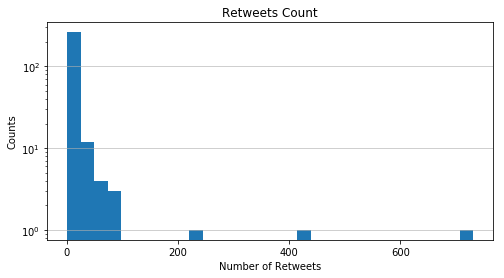

In [38]:
plt.figure(figsize=(8,4))
plt.hist(original_RT_Tweets.retweet_count,bins=30,log=True)
plt.xlabel('Number of Retweets')
plt.ylabel('Counts')
plt.title(r'Retweets Count')
plt.grid(axis='y', alpha=0.75)
plt.locator_params(axis='x',nbins=6)

plt.show()

In [52]:
list_final = []
for text in original_RT_Tweets['tweet_text']:
    list_final.append([word.lower() for word in text.split() 
                       if (word.lower() not in stopwords and ("http" not in word.lower()) and
                           (len(word)>3))])

In [53]:
list_final

[['#racism', 'america'],
 ['russo', 'turisto'],
 ['#racism', 'america'],
 ['accurate!'],
 ['“nonconsensual', 'gardening”', 'hahahahahaaaa'],
 ['super', 'innovative!'],
 ['punish', 'criminals', 'police', 'uniform!', '#blacklivesmatter'],
 ['accurate!'],
 ['punish', 'criminals', 'police', 'uniform!', '#blacklivesmatter'],
 ['punish', 'criminals', 'police', 'uniform!', '#blacklivesmatter'],
 ['punish', 'criminals', 'police', 'uniform!', '#blacklivesmatter'],
 ['punish', 'criminals', 'police', 'uniform!', '#blacklivesmatter'],
 ['damn,', 'adobe', 'illustrator'],
 ['punish', 'criminals', 'police', 'uniform!', '#blacklivesmatter'],
 ['non-agenda', 'news'],
 ['punish', 'criminals', 'police', 'uniform!', '#blacklivesmatter'],
 ['super', 'innovative!'],
 ['accurate!', '#tcot', '#pjnet'],
 ['aah...no'],
 ['more',
  'illegal',
  'aliens!',
  '#nosyrianrefugees',
  '#tcot',
  '#ccot',
  '#pjnet'],
 ['punish', 'criminals', 'police', 'uniform!', '#blacklivesmatter'],
 ['accurate!', '#libtards'],
 ['

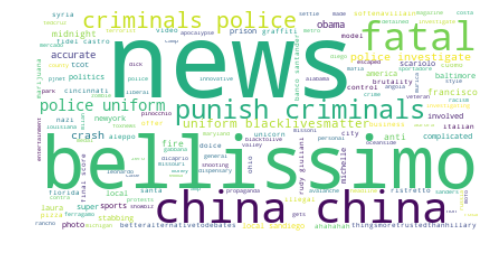

In [57]:
text = " ".join([word for tweet in list_final for word in tweet])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()